In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

plt.rcParams["figure.figsize"] = (20, 10)


def get_period(data):
    # Assuming 'data' is your np array
    peaks, _ = find_peaks(data)

    # Check for at least 2 peaks to compute a period
    return (peaks[-1] - peaks[0]) / (len(peaks) - 1)


def moving_avg(arr, window_size):
    num_values = len(arr) - window_size + 1

    # Create an empty array to store the moving average values
    avg = np.empty(num_values)

    # Compute the forward moving average
    for i in range(num_values):
        avg[i] = np.mean(arr[i : i + window_size])

    return avg

f(T=500,delta_t=0.09).npy
0.36131386861313863
f(T=500,delta_t=0.08).npy
0.3614598540145985
f(T=500,delta_t=0.07).npy
0.36175182481751833
f(T=500,delta_t=0.06).npy
0.3613138686131387
f(T=500,delta_t=0.05).npy
0.35942028985507246
f(T=500,delta_t=0.04).npy
0.35884057971014494
f(T=500,delta_t=0.03).npy
0.34880281690140846
f(T=500,delta_t=0.02).npy
0.31756410256410256


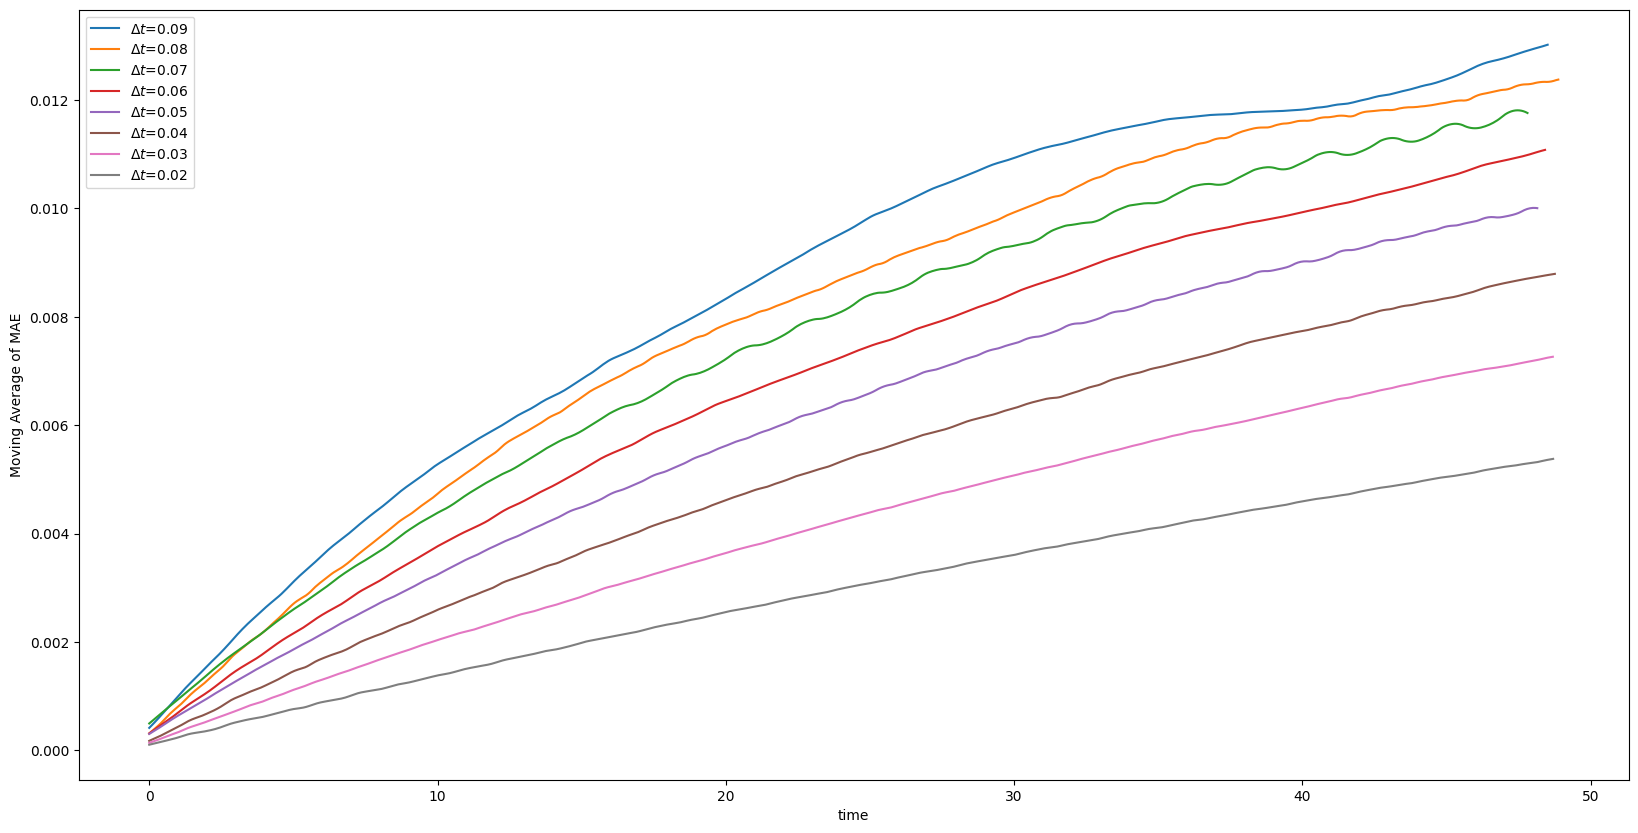

In [2]:
folder_name = ""  # replace 'path_to_the_folder' with the actual path
directory = os.path.join(os.getcwd(), folder_name)
# directory.sort()

t_list = np.arange(0.02, 0.1, 0.01)
t_list = np.flip(t_list)
index = 0
lgd = []
count = 0

period = 0

x_y = []

# Iterate over all files in the directory
for filename in sorted(os.listdir(directory), reverse=True):
    if filename.endswith(".npy"):
        if "f" in filename:
            print(filename)
            if count >= 10:
                plt.legend(lgd)
                plt.show()
                count = 0
                lgd = []

            delta_t = round(t_list[index], 3)
            arr = np.load(os.path.join(directory, filename))
            # plt.plot(arr)
            # plt.plot(np.arange(0,delta_t*len(arr),delta_t)[:1000],arr[:1000])
            period = get_period(arr) * delta_t
            print(period)
            avg = moving_avg(arr, int(period / delta_t))
            for i in range(2):
                avg = moving_avg(avg, int(get_period(avg)))

            x_val = np.arange(0, delta_t * len(avg), delta_t)
            y_val = avg

            max_len = min(len(x_val), len(y_val))
            plt.plot(x_val[:max_len], y_val[:max_len])
            xy = np.array([x_val[:max_len], y_val[:max_len]])
            np.save(str(delta_t) + ".npy", xy)
            x_y.append((x_val[:max_len], y_val[:max_len]))
            index += 1
            lgd.append(r"$\Delta t$=" + str(delta_t))

plt.xlabel('time')
plt.ylabel('Moving Average of MAE')
plt.legend(lgd)
plt.show()

## Error vs t
$y=a-be^{-\lambda t}$

C:\Users\chen9\AppData\Local\Temp\ipykernel_21004\1883953739.py:3: RuntimeWarning: overflow encountered in exp
  return a - b*np.exp(-l*x)


0.01491
0.01501
0.01525
0.01525


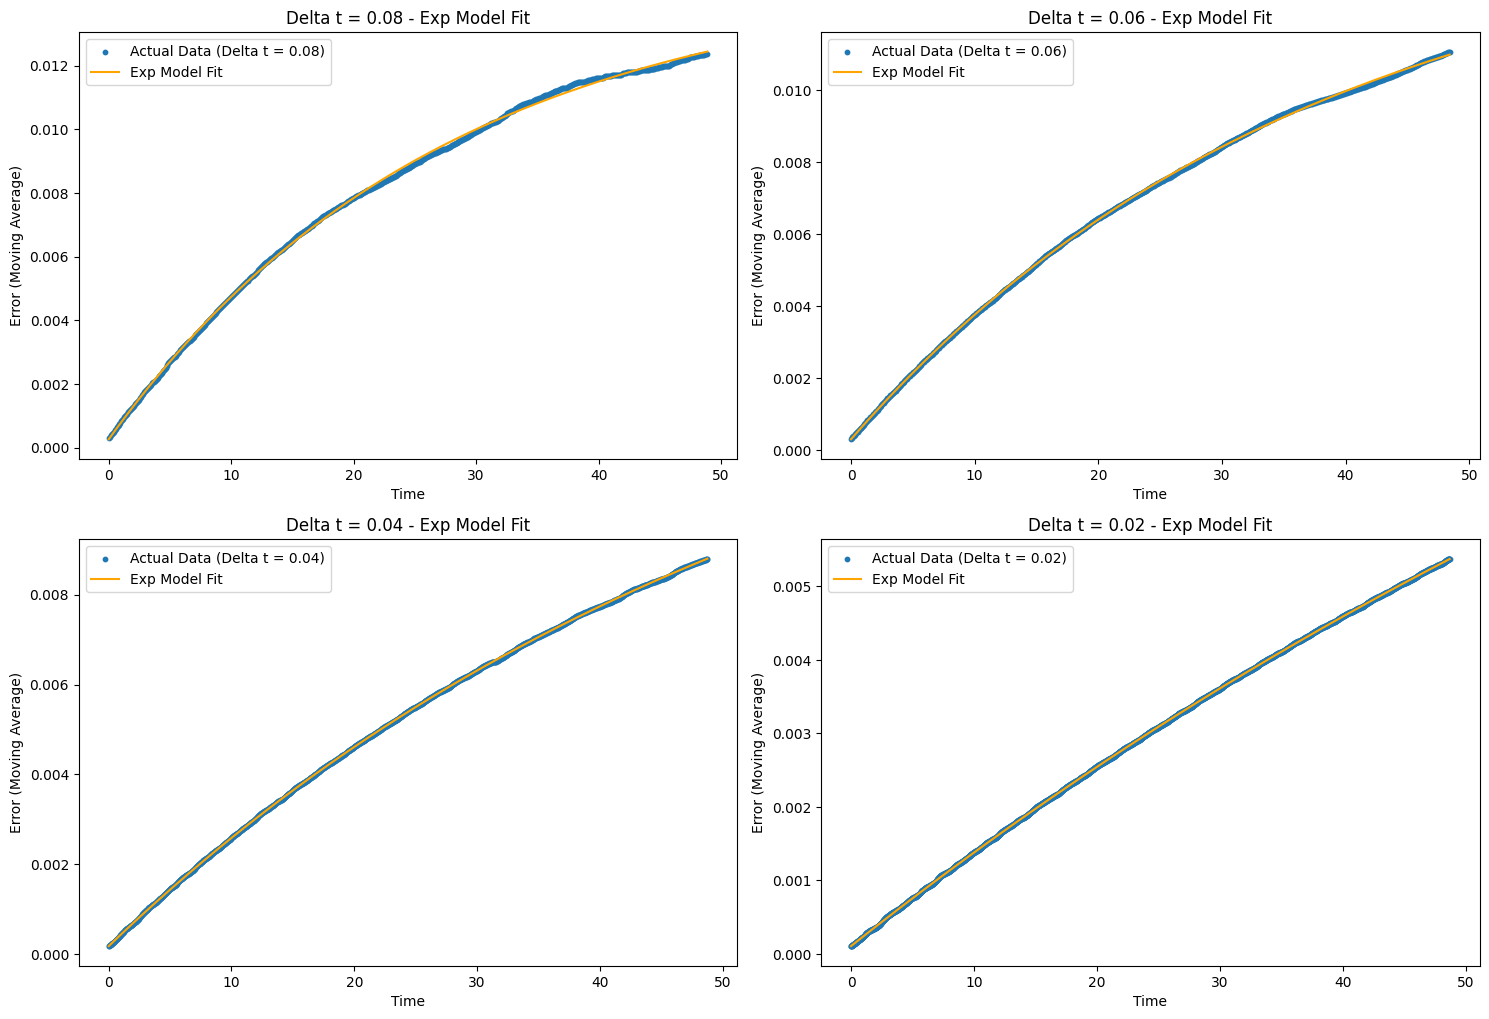

0.09: a=0.014771459022814218, b=0.014421052572871318, lambda=0.041670851463756146
R2=0.997631617531588, MSE=2.9178016017178096e-08
0.08: a=0.014912315693593855, b=0.01465178858319802, lambda=0.03645054683257943
R2=0.9993439064384108, MSE=7.754014807460151e-09
0.07: a=0.015126403597642403, b=0.01462068105597531, lambda=0.030778956950179244
R2=0.9998634604260278, MSE=1.3989940176803914e-09
0.06: a=0.015007807546683842, b=0.014705051134497956, lambda=0.026835974873146273
R2=0.9998255735165346, MSE=1.6223842034077418e-09
0.05: a=0.015078535293324091, b=0.014770781792141951, lambda=0.02223733073428739
R2=0.9999801316787682, MSE=1.534826892341767e-10
0.04: a=0.015246817083137952, b=0.01506798545952412, lambda=0.01742551294857151
R2=0.9999761313464826, MSE=1.4649071980909228e-10
0.03: a=0.015051962290231, b=0.014907088606714615, lambda=0.013379390870664112
R2=0.9999737198629275, MSE=1.1088702481522084e-10
0.02: a=0.015247763917077632, b=0.015142162793286272, lambda=0.008778323848967226
R2=0.9

<Figure size 2000x1000 with 0 Axes>

In [9]:
# Define the square root model function
def exp_model(x, a, b, l):
    return a - b*np.exp(-l*x)
    return -a * np.exp(-b * x) + c


# List of delta_t values
delta_ts = t_list

# Load the data from .npy files and store in a dictionary with delta_t as keys
data_dict = {}
for delta_t in delta_ts:
    delta_t = round(delta_t, 4)
    file_path = f"{delta_t}.npy"
    data = np.load(file_path, allow_pickle=True)
    data_dict[delta_t] = {"x_coordinates": data[0], "y_coordinates": data[1]}

# Fit the square root model to each dataset and calculate the performance metrics
exp_model_fits = {}
for delta_t, data in data_dict.items():
    # Fit the square root model
    exp_params, _ = curve_fit(exp_model, data["x_coordinates"], data["y_coordinates"])

    # Calculate performance
    y_pred = exp_model(data["x_coordinates"], *exp_params)
    r2 = r2_score(data["y_coordinates"], y_pred)
    mse = mean_squared_error(data["y_coordinates"], y_pred)

    # Store the results
    exp_model_fits[delta_t] = {
        "exp_params": exp_params,
        "performance": {"R2": r2, "MSE": mse},
    }

# Plotting the actual data and the fitted models for each delta_t
plt.figure(figsize=(15, 20))
for i, (delta_t, data) in enumerate(data_dict.items()):
    # Generate a range of x values for plotting the fitted model
    x_range = np.linspace(min(data["x_coordinates"]), max(data["x_coordinates"]), 500)
    # Generate the predicted y values using the fitted square root model
    y_pred = exp_model(x_range, *exp_model_fits[delta_t]["exp_params"])

    # Subplot for each delta_t
    if delta_t == 0.02 or delta_t == 0.04 or delta_t == 0.06 or delta_t == 0.08:
        plt.subplot(len(data_dict) // 2 + len(data_dict) % 2, 2, (i + 1)//2)
        
        plt.scatter(
            data["x_coordinates"],
            data["y_coordinates"],
            s=10,
            label=f"Actual Data (Delta t = {delta_t})",
        )
        a = round(exp_model_fits[delta_t]["exp_params"][0],5)
        b=round(exp_model_fits[delta_t]["exp_params"][1],5)
        c=round(exp_model_fits[delta_t]["exp_params"][2],5)
        print(a)
        plt.plot(x_range, y_pred, color="orange", label="Exp Model Fit")
        plt.title(f"Delta t = {delta_t} - Exp Model Fit")
        #plt.title(f"Delta t = {delta_t} - Exp Model Fit: " + rf'${a:.5f}-{c:.5f}e^{{{b:.5f}}}x$')
        plt.xlabel("Time")
        plt.ylabel("Error (Moving Average)")
        plt.legend()

plt.tight_layout()
plt.show()
plt.savefig("data_fit.png")

b_4096 = {}
for delta_t in exp_model_fits.keys():
    print(
        f'{delta_t}: a={exp_model_fits[delta_t]["exp_params"][0]}, b={exp_model_fits[delta_t]["exp_params"][1]}, lambda={exp_model_fits[delta_t]["exp_params"][2]}'
    )
    print(
        f'R2={exp_model_fits[delta_t]["performance"]["R2"]}, MSE={exp_model_fits[delta_t]["performance"]["MSE"]}'
    )
    b_4096[delta_t] = exp_model_fits[delta_t]["exp_params"][2]

## Error vs Δt 

{0.09: 0.041670851463756146, 0.08: 0.03645054683257943, 0.07: 0.030778956950179244, 0.06: 0.026835974873146273, 0.05: 0.02223733073428739, 0.04: 0.01742551294857151, 0.03: 0.013379390870664112, 0.02: 0.008778323848967226}


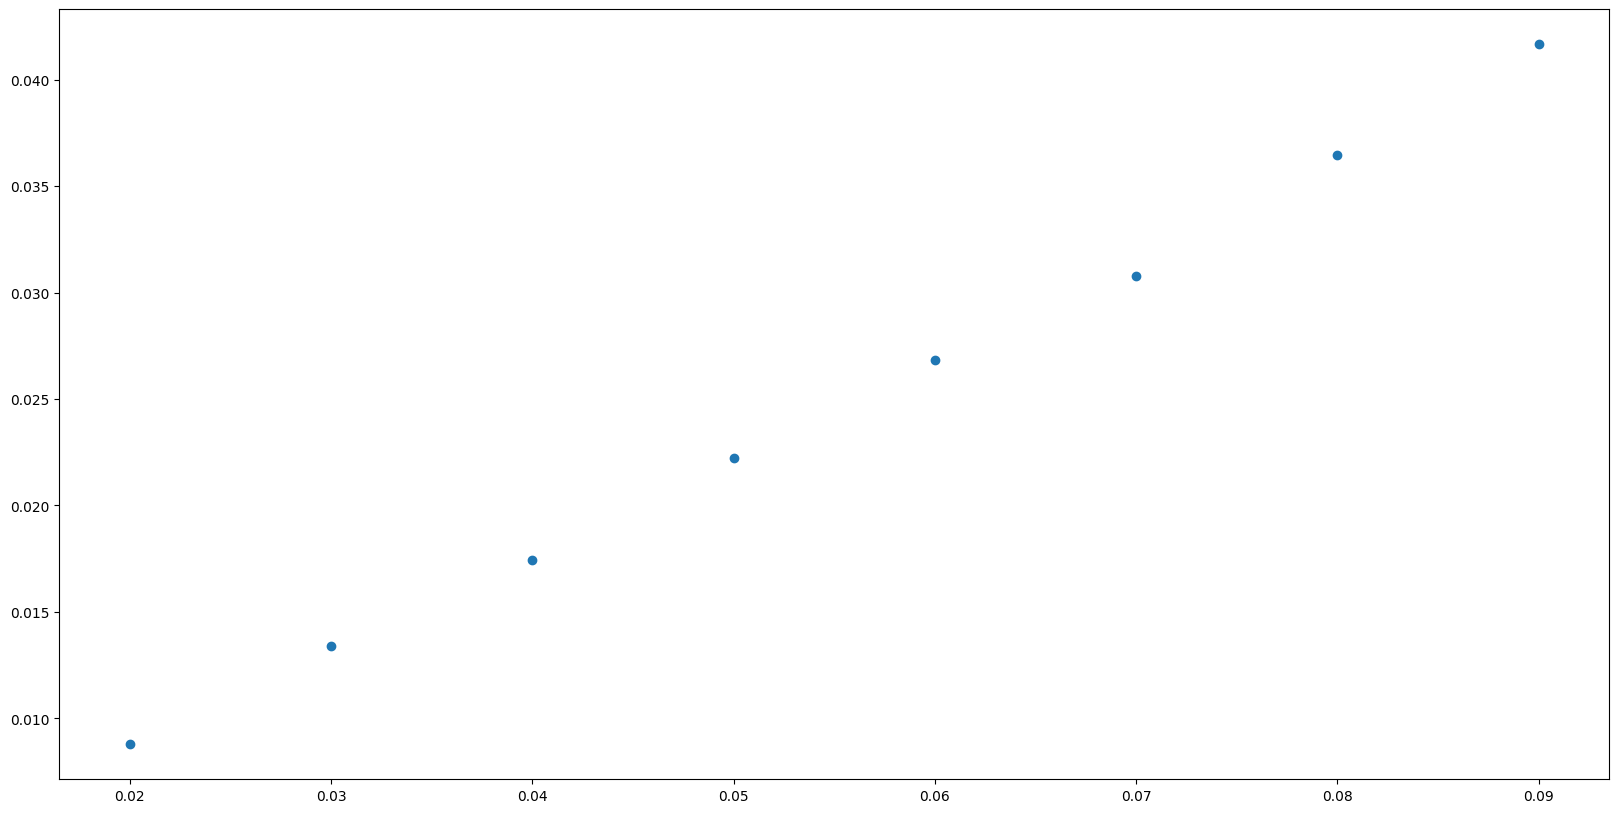

In [10]:
plt.scatter(b_4096.keys(), b_4096.values())
print(b_4096)

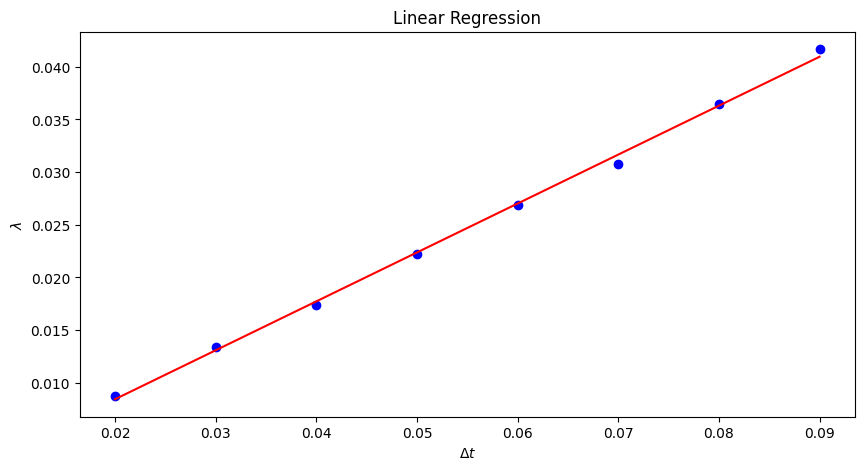

0.9981680817409255
2.0797765441960435e-07


In [13]:
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (10, 5)

# Data
x = np.array(list(b_4096.keys()))
y = np.array(list(b_4096.values()))
# Reshaping the data
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(x, y)

# Predictions
y_pred = model.predict(x)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plotting
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$\lambda$')
plt.show()

print(r2)
print(mse)
